# Get imports and prepare the synthetic data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
sns.set()
sns.set_style("darkgrid", {'image.cmap': u'plasma'})

np.random.seed(11111111)

In [15]:
# define the mean retunrs and the standard deviations for a synthetic, 2-stock portfolio
mean_return = 0.01 * np.random.randn(2) # return from distribution with mean 0 standard deviation 0.01
rho = 0.01 * np.random.randn() # generate a random correlation coefficient between the two stocks
sigma = np.exp(np.random.randn(2)) # generate a random standard deviation for the two stocks. We use the exponential function to ensure that the standard deviations are positive

In [16]:
print(mean_return, rho, sigma)

[-0.00798242  0.00181554] 0.007129547452251222 [2.83423006 0.50425457]


In [17]:
# create the covariance matrix
cov = np.array([[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]])
print(cov)

[[8.03286002 0.01018936]
 [0.01018936 0.25427267]]


In [18]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return e_x / e_x.sum()


# Generate random long-portofolios

In [37]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    # generate random weights for the two stocks in the portfolio and normalize them to sum to 1 
    # using the softmax function defined above 
    weights = softmax(np.random.randn(2))
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

In [29]:
def plot_portfolios(returns, risks):
    """Plot the returns and risks of the portfolios.
    Draw a scatter plot of the returns and the risks of the portfolios
    The color of the points is determined by the density of the points
    """
    plt.figure(figsize=(10, 6))
    xy = np.vstack([risks,returns])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    risks, returns, z = risks[idx], returns[idx], z[idx]
    plt.scatter(risks, returns, c=z, marker='o')
    plt.xlabel('Risk')
    plt.ylabel('Return')



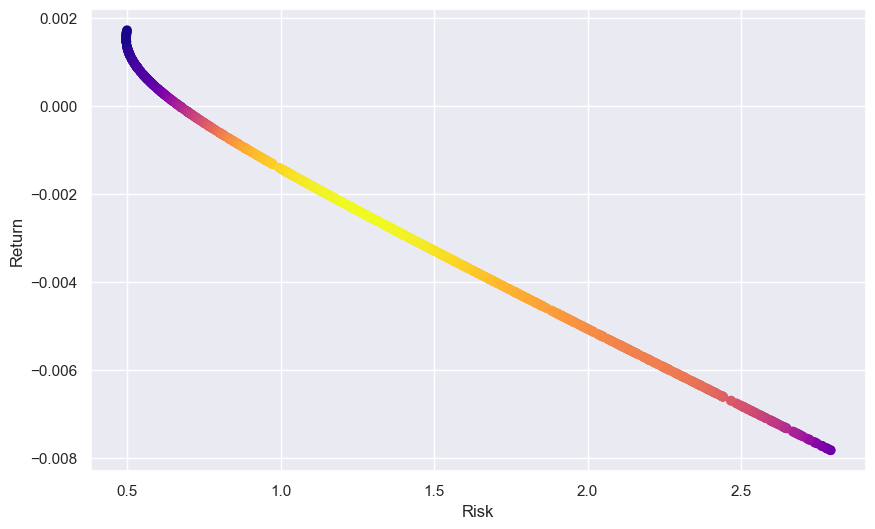

In [30]:
plot_portfolios(returns, risks) # plot the portfolios generated above

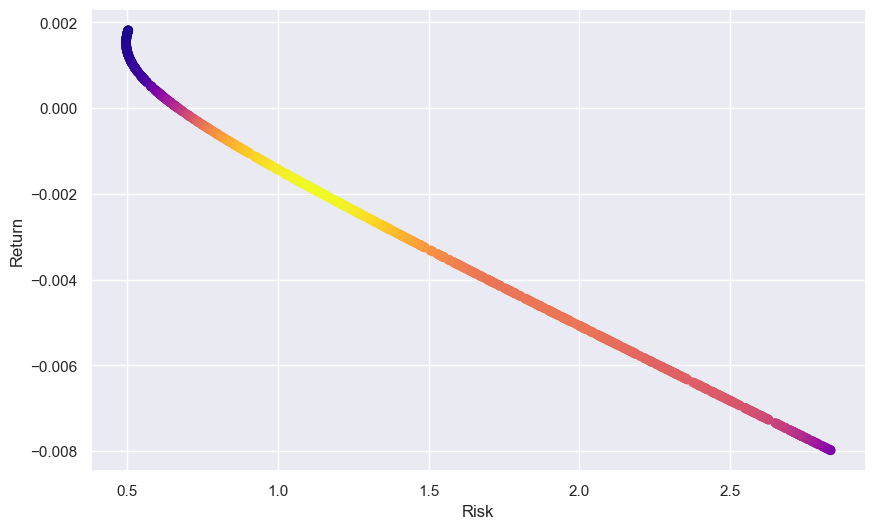

In [40]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x = np.random.random() # generate a random number from a normal distribution
    weights = np.array([x, 1-x]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Generate portofolios allowing for short selling

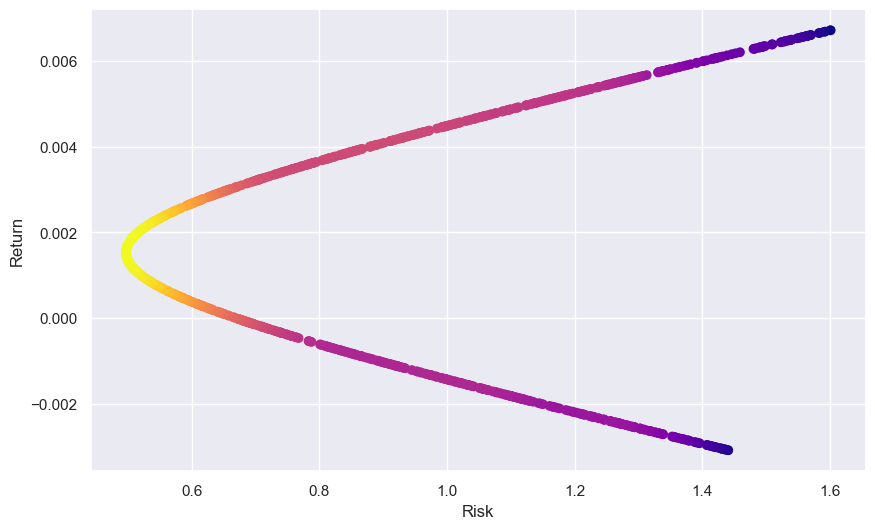

In [41]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x = np.random.random() - 0.5 # generate a random number from a normal distribution
    weights = np.array([x, 1-x]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Expand the above the 3-asset portofolio

In [45]:
# define the mean retunrs and the standard deviations for a synthetic, 3-stock portfolio
mean_return = 0.01 * np.random.randn(3) # return from distribution with mean 0 standard deviation 0.01
rho = 0.01 * np.random.randn(3) # generate random correlation coefficients between the three stocks
sigma = np.exp(np.random.randn(3)) # generate a random standard deviation for the three stocks. We use the exponential function to ensure that the standard deviations are positive

In [46]:
print(mean_return, rho, sigma)

[ 0.00953167 -0.00173701  0.01564288] [-0.00738551 -0.00804263  0.01026944] [1.71853768 1.82842356 2.00643187]


In [51]:
# calculate the covariance matrix for the three stocks
cov = np.array([[sigma[0]**2, rho[0]*sigma[0]*sigma[1], rho[1]*sigma[0]*sigma[2]],
                [rho[0]*sigma[0]*sigma[1], sigma[1]**2, rho[2]*sigma[1]*sigma[2]],
                [rho[1]*sigma[0]*sigma[2], rho[2]*sigma[1]*sigma[2], sigma[2]**2]])
print(cov)

[[ 2.95337175 -0.02320687 -0.02773204]
 [-0.02320687  3.34313271  0.03767454]
 [-0.02773204  0.03767454  4.02576885]]


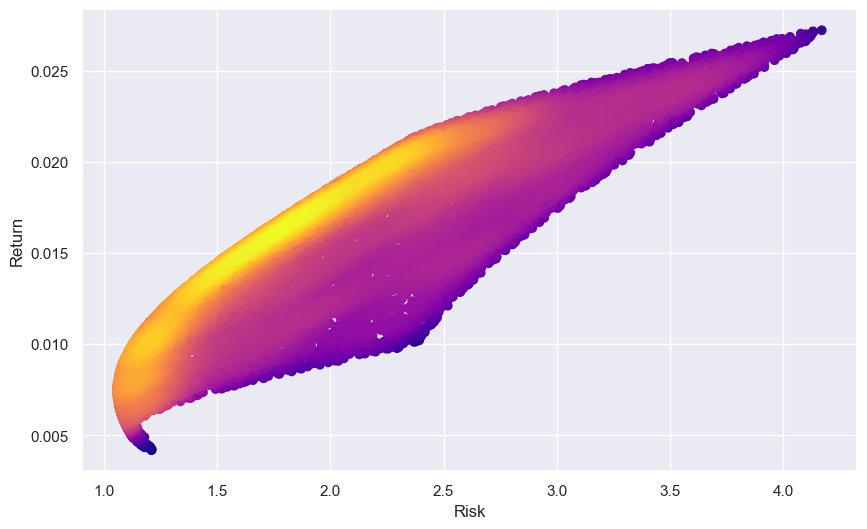

In [50]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 10000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x1, x2 = np.random.random(2) - 0.5 # generate a random number from a normal distribution
    weights = np.array([x1, x2, 1-x1-x2]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Finding Maximum and Minimum with a Linear Program (LP)

In [52]:
from scipy.optimize import linprog

In [54]:
D = len(mean_return) # number of stocks in the portfolio
A_eq = np.ones((1, D)) # create the equality constraint matrix
b_eq = np.ones(1) # create the equality constraint vector
bounds = tuple((-0.5, None) for x in range(D)) # set the bounds of the weights to be between -0.5 and no upper bound
print(A_eq, b_eq, bounds)

[[1. 1. 1.]] [1.] ((-0.5, None), (-0.5, None), (-0.5, None))


In [55]:
# minimize the risk of the portfolio
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
min_return = res.fun
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.016061286144455567
              x: [-5.000e-01  2.000e+00 -5.000e-01]
            nit: 0
          lower:  residual: [ 0.000e+00  2.500e+00  0.000e+00]
                 marginals: [ 1.127e-02  0.000e+00  1.738e-02]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-1.737e-03]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [56]:
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
max_return = -res.fun
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.027388425031436486
              x: [-5.000e-01 -5.000e-01  2.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  2.500e+00]
                 marginals: [ 6.111e-03  1.738e-02  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-1.564e-02]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [57]:
print(min_return, max_return)

-0.016061286144455567 0.027388425031436486
